In [11]:
# STEP 0: Setup & Import
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Append project root for module imports
sys.path.append(os.path.abspath(".."))

from src.inference import forecast_future

# Create folders if missing
os.makedirs("../plots", exist_ok=True)
os.makedirs("../data/processed", exist_ok=True)

plt.style.use("seaborn-v0_8")
print("✅ Setup complete")

✅ Setup complete


In [12]:
# STEP 1: Load Cleaned Dataset
df = pd.read_csv("../data/processed/air_quality_cleaned.csv", index_col=0, parse_dates=True)
print(f"Dataset loaded: {df.shape} rows and columns")


Dataset loaded: (29531, 18) rows and columns


In [13]:
# STEP 2: Define AQI Category Functions for pollutants
def categorize_pm25(val):
    if val <= 12: return "Good"
    elif val <= 35.4: return "Moderate"
    elif val <= 55.4: return "Unhealthy for Sensitive Groups"
    elif val <= 150.4: return "Unhealthy"
    elif val <= 250.4: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_pm10(val):
    if val <= 54: return "Good"
    elif val <= 154: return "Moderate"
    elif val <= 254: return "Unhealthy for Sensitive Groups"
    elif val <= 354: return "Unhealthy"
    elif val <= 424: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_no2(val):
    if val <= 53: return "Good"
    elif val <= 100: return "Moderate"
    elif val <= 360: return "Unhealthy for Sensitive Groups"
    elif val <= 649: return "Unhealthy"
    elif val <= 1249: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_o3(val):
    if val <= 54: return "Good"
    elif val <= 70: return "Moderate"
    elif val <= 85: return "Unhealthy for Sensitive Groups"
    elif val <= 105: return "Unhealthy"
    elif val <= 200: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_co(val):
    if val <= 4.4: return "Good"
    elif val <= 9.4: return "Moderate"
    elif val <= 12.4: return "Unhealthy for Sensitive Groups"
    elif val <= 15.4: return "Unhealthy"
    elif val <= 30.4: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_so2(val):
    if val <= 35: return "Good"
    elif val <= 75: return "Moderate"
    elif val <= 185: return "Unhealthy for Sensitive Groups"
    elif val <= 304: return "Unhealthy"
    elif val <= 604: return "Very Unhealthy"
    else: return "Hazardous"


In [14]:
forecast_days = 7
pollutants = ["PM2.5","PM10","NO2","O3","CO","SO2","NOx","NO"]  # Changed 'NOX' to 'NOx'


forecast_dict = {}
for pollutant in pollutants:
    series = df[pollutant].dropna()

    # Remove duplicate date indices before frequency conversion
    series = series[~series.index.duplicated(keep='first')]

    series = series.asfreq("D")

    forecast_dict[pollutant] = forecast_future(pollutant, series, days=forecast_days)

forecast_df = pd.DataFrame(forecast_dict)
forecast_df.index.name = "Date"
forecast_df


🔍 DEBUG: Last historical date: 2020-07-01
🔍 DEBUG: Today's date: 2025-09-29
🔍 DEBUG: Future prediction starts from: 2025-09-30
🔍 DEBUG: Future dates: DatetimeIndex(['2025-09-30', '2025-10-01', '2025-10-02', '2025-10-03',
               '2025-10-04', '2025-10-05', '2025-10-06'],
              dtype='datetime64[ns]', freq='D')
🔍 DEBUG: Last historical date: 2020-07-01
🔍 DEBUG: Today's date: 2025-09-29
🔍 DEBUG: Future prediction starts from: 2025-09-30
🔍 DEBUG: Future dates: DatetimeIndex(['2025-09-30', '2025-10-01', '2025-10-02', '2025-10-03',
               '2025-10-04', '2025-10-05', '2025-10-06'],
              dtype='datetime64[ns]', freq='D')
🔍 DEBUG: Last historical date: 2020-07-01
🔍 DEBUG: Today's date: 2025-09-29
🔍 DEBUG: Future prediction starts from: 2025-09-30
🔍 DEBUG: Future dates: DatetimeIndex(['2025-09-30', '2025-10-01', '2025-10-02', '2025-10-03',
               '2025-10-04', '2025-10-05', '2025-10-06'],
              dtype='datetime64[ns]', freq='D')
🔍 DEBUG: Last histo

,PM2.5,PM10,NO2,O3,CO,SO2,NOx,NO
Date,,,,,,,,
2025-09-30,7.350603,75.084574,8.043300,4.313826,28.861810,5.151646,28.413687,12.571532
2025-10-01,7.299046,75.327106,8.110958,4.220899,25.937573,4.938595,28.912045,11.077625
2025-10-02,6.818710,76.239432,9.190559,4.008680,26.558757,5.214705,27.814411,11.433167
2025-10-03,6.688656,72.497212,8.104528,4.470101,30.517630,5.498119,28.168436,12.426755
2025-10-04,6.844864,71.184686,8.920147,4.427265,25.941609,5.445888,28.062021,13.555474
2025-10-05,6.427812,77.661471,8.593384,3.787004,29.128627,5.942603,26.874548,11.769071
2025-10-06,6.951259,80.352498,8.074089,3.917517,26.076515,5.797105,26.534628,12.520118


In [15]:
# STEP 4: Convert Forecasts to AQI Categories
aqi_categories = {}

def categorize_pm25(val):
    if val <= 12: return "Good"
    elif val <= 35.4: return "Moderate"
    elif val <= 55.4: return "Unhealthy for Sensitive Groups"
    elif val <= 150.4: return "Unhealthy"
    elif val <= 250.4: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_pm10(val):
    if val <= 54: return "Good"
    elif val <= 154: return "Moderate"
    elif val <= 254: return "Unhealthy for Sensitive Groups"
    elif val <= 354: return "Unhealthy"
    elif val <= 424: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_no2(val):
    if val <= 53: return "Good"
    elif val <= 100: return "Moderate"
    elif val <= 360: return "Unhealthy for Sensitive Groups"
    elif val <= 649: return "Unhealthy"
    elif val <= 1249: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_o3(val):
    if val <= 54: return "Good"
    elif val <= 70: return "Moderate"
    elif val <= 85: return "Unhealthy for Sensitive Groups"
    elif val <= 105: return "Unhealthy"
    elif val <= 200: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_co(val):
    if val <= 4.4: return "Good"
    elif val <= 9.4: return "Moderate"
    elif val <= 12.4: return "Unhealthy for Sensitive Groups"
    elif val <= 15.4: return "Unhealthy"
    elif val <= 30.4: return "Very Unhealthy"
    else: return "Hazardous"

def categorize_so2(val):
    if val <= 35: return "Good"
    elif val <= 75: return "Moderate"
    elif val <= 185: return "Unhealthy for Sensitive Groups"
    elif val <= 304: return "Unhealthy"
    elif val <= 604: return "Very Unhealthy"
    else: return "Hazardous"

for pollutant in forecast_df.columns:
    if pollutant == "PM2.5":
        aqi_categories[pollutant] = forecast_df[pollutant].apply(categorize_pm25)
    elif pollutant == "PM10":
        aqi_categories[pollutant] = forecast_df[pollutant].apply(categorize_pm10)
    elif pollutant == "NO2":
        aqi_categories[pollutant] = forecast_df[pollutant].apply(categorize_no2)
    elif pollutant == "O3":
        aqi_categories[pollutant] = forecast_df[pollutant].apply(categorize_o3)
    elif pollutant == "CO":
        aqi_categories[pollutant] = forecast_df[pollutant].apply(categorize_co)
    elif pollutant == "SO2":
        aqi_categories[pollutant] = forecast_df[pollutant].apply(categorize_so2)
    else:
        aqi_categories[pollutant] = pd.Series(["Unknown"] * len(forecast_df), index=forecast_df.index)

In [16]:
# STEP 5: Compute Overall AQI level and category
category_mapping = {
    "Good": 1,
    "Moderate": 2,
    "Unhealthy for Sensitive Groups": 3,
    "Unhealthy": 4,
    "Very Unhealthy": 5,
    "Hazardous": 6,
    "Unknown": 0
}

reverse_mapping = {v: k for k, v in category_mapping.items()}

aqi_numeric = pd.DataFrame({p: aqi_categories[p].map(category_mapping) for p in aqi_categories})
forecast_df["Overall_AQI_Level"] = aqi_numeric.max(axis=1)
forecast_df["Overall_AQI_Category"] = forecast_df["Overall_AQI_Level"].map(reverse_mapping)

In [20]:
# STEP 6: Identify High-Risk Alert Days
high_risk_days = forecast_df[forecast_df["Overall_AQI_Level"] >= 4]  # Unhealthy or worse
print("High-risk forecast days:")
high_risk_days[["Overall_AQI_Category"]]

High-risk forecast days:


,Overall_AQI_Category
Date,
2025-09-30,Very Unhealthy
2025-10-01,Very Unhealthy
2025-10-02,Very Unhealthy
2025-10-03,Hazardous
2025-10-04,Very Unhealthy
2025-10-05,Very Unhealthy
2025-10-06,Very Unhealthy


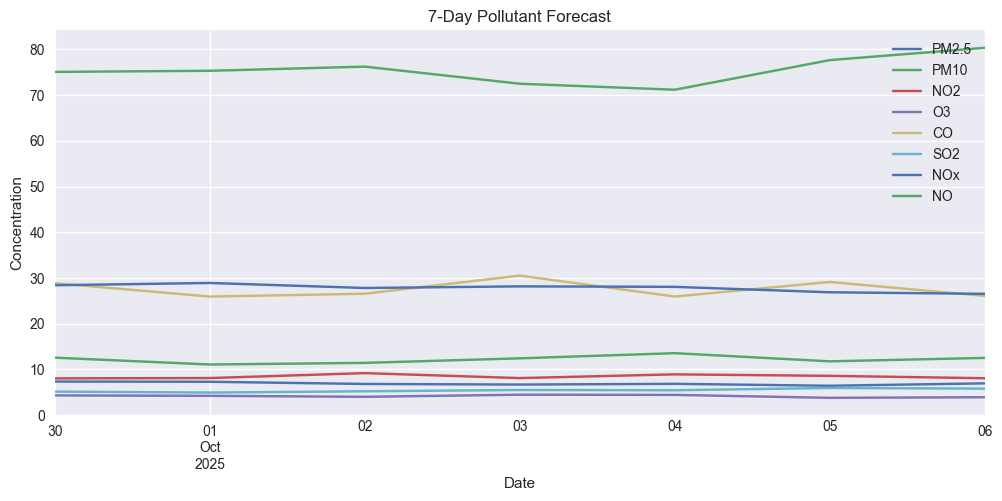

In [21]:
# STEP 7: Visualizations
# 1. Line plot of pollutants
plt.figure(figsize=(12,5))
for pollutant in pollutants:
    forecast_df[pollutant].plot(label=pollutant)
plt.title("7-Day Pollutant Forecast")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.savefig("../plots/forecast_lineplot.png")
plt.show()

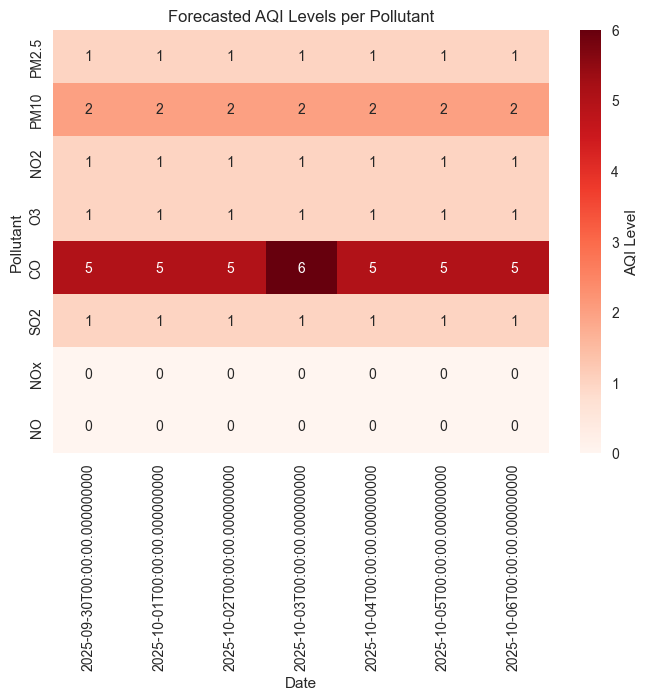

In [22]:
# 2. AQI Heatmap
sns.heatmap(aqi_numeric.T, annot=True, cmap="Reds", cbar_kws={'label':'AQI Level'})
plt.title("Forecasted AQI Levels per Pollutant")
plt.xlabel("Date")
plt.ylabel("Pollutant")
plt.savefig("../plots/forecast_aqi_heatmap.png")
plt.show()


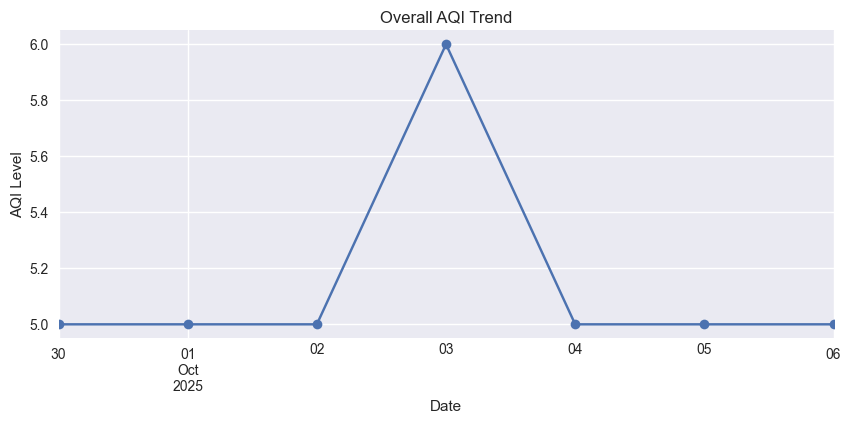

In [23]:
# 3. Overall AQI trend
forecast_df["Overall_AQI_Level"].plot(kind='line', marker='o', figsize=(10,4), title="Overall AQI Trend")
plt.ylabel("AQI Level")
plt.savefig("../plots/overall_aqi_trend.png")
plt.show()

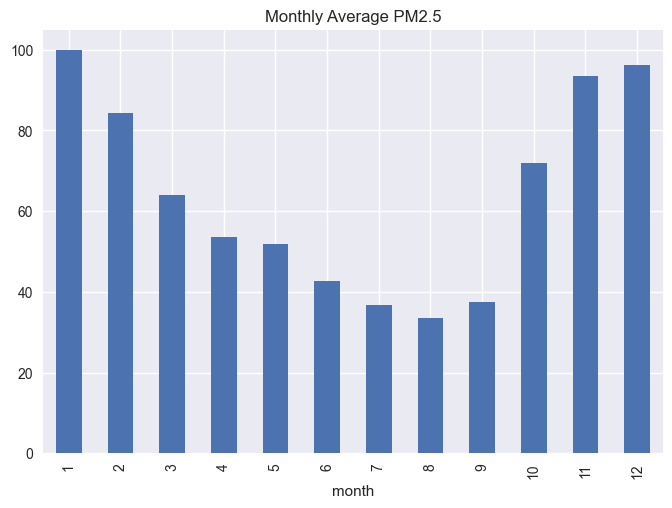

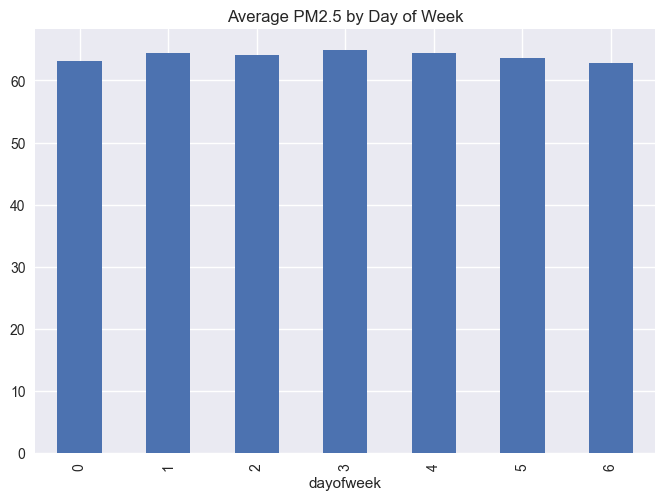

In [24]:
# 4. Optional: Seasonal Analysis
df['month'] = df.index.month
df.groupby('month')['PM2.5'].mean().plot(kind='bar', title="Monthly Average PM2.5")
plt.savefig("../plots/monthly_pm25.png")
plt.show()

df['dayofweek'] = df.index.dayofweek
df.groupby('dayofweek')['PM2.5'].mean().plot(kind='bar', title="Average PM2.5 by Day of Week")
plt.savefig("../plots/dayofweek_pm25.png")
plt.show()

In [25]:
# STEP 8: Save Outputs for Module 4 Dashboard
forecast_df.to_csv("../data/processed/forecast_7days_full.csv")
high_risk_days.to_csv("../data/processed/high_risk_alerts.csv")
print("✅ Forecasts and high-risk alerts saved for dashboard use.")

✅ Forecasts and high-risk alerts saved for dashboard use.


In [26]:
# ====================== Save Forecasts & Alerts into MySQL ======================

import sys, os
import pandas as pd
from src.db import SessionLocal, Prediction, Alert

# Make sure src is visible
sys.path.append(os.path.abspath(".."))

# -------------------- Paths --------------------
DATA_DIR = os.path.join("..", "data", "processed")
forecast_csv = os.path.join(DATA_DIR, "forecast_7days_full.csv")
alerts_csv = os.path.join(DATA_DIR, "high_risk_alerts.csv")

# -------------------- Load Forecast Data --------------------
try:
    forecast_df = pd.read_csv(forecast_csv, index_col=0, parse_dates=True)
    print(f"✅ Loaded forecast_df: {len(forecast_df)} rows")
except FileNotFoundError:
    forecast_df = pd.DataFrame()
    print("⚠️ forecast_7days_full.csv not found. forecast_df is empty.")

# -------------------- Load High-Risk Alerts --------------------
try:
    high_risk_days = pd.read_csv(alerts_csv, index_col=0, parse_dates=True)
    print(f"✅ Loaded high_risk_days: {len(high_risk_days)} rows")
except FileNotFoundError:
    high_risk_days = pd.DataFrame()
    print("⚠️ high_risk_alerts.csv not found. high_risk_days is empty.")

# -------------------- Save Function --------------------
def save_forecasts_and_alerts(forecast_df, high_risk_days):
    session = SessionLocal()
    try:
        # Save forecasts
        for date, row in forecast_df.iterrows():
            for pollutant in ["PM2.5","PM10","NO2","O3","CO","SO2"]:
                if pollutant in row:
                    pred = Prediction(date=date, pollutant=pollutant, value=row[pollutant])
                    session.add(pred)

        # Save alerts
        for date, row in high_risk_days.iterrows():
            alert = Alert(
                date=date,
                overall_aqi_category=row.get("Overall_AQI_Category", "Unknown"),
                message=f"High AQI: {row.get('Overall_AQI_Category','Unknown')} on {date.date()}"
            )
            session.add(alert)

        session.commit()
        print("✅ Saved forecasts & alerts into MySQL DB")

    except Exception as e:
        session.rollback()
        print("❌ DB Error:", e)
    finally:
        session.close()

# -------------------- Call the Function --------------------
save_forecasts_and_alerts(forecast_df, high_risk_days)


✅ Loaded forecast_df: 7 rows
✅ Loaded high_risk_days: 7 rows
2025-09-29 23:49:48,764 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2025-09-29 23:49:48,767 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-09-29 23:49:48,779 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2025-09-29 23:49:48,782 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-09-29 23:49:48,790 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2025-09-29 23:49:48,793 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-09-29 23:49:48,813 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-09-29 23:49:48,859 INFO sqlalchemy.engine.Engine INSERT INTO alerts (date, overall_aqi_category, message) VALUES (%(date)s, %(overall_aqi_category)s, %(message)s)
2025-09-29 23:49:48,868 INFO sqlalchemy.engine.Engine [generated in 0.00927s] {'date': Timestamp('2025-09-30 00:00:00'), 'overall_aqi_category': 'Very Unhealthy', 'message': 'High AQI: Very Unhealthy on 2025-09-30'}
2025-09-29 23:49:48,997 INFO sqlalchemy.engine.Engine